000번 사진 촬영 완료



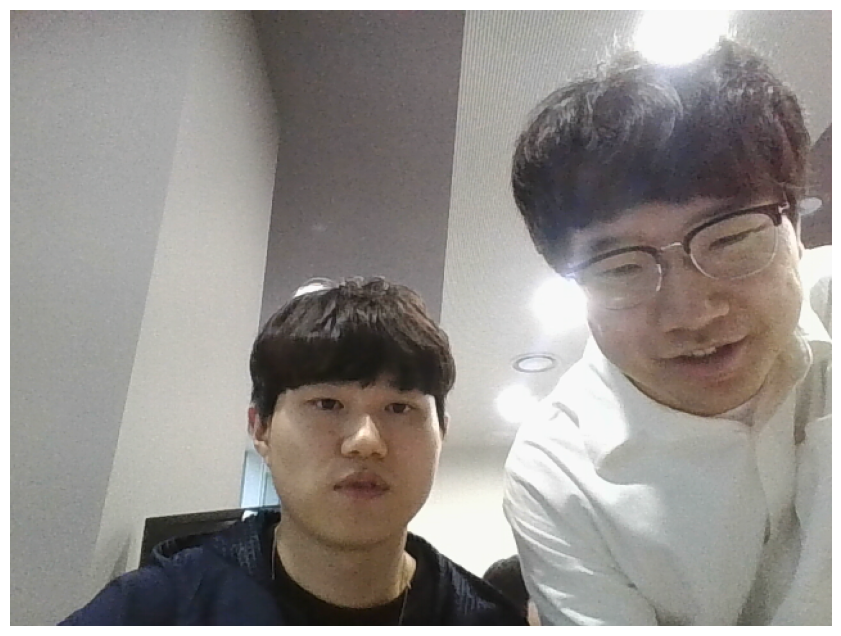

Face Detect : 2
['face_recognition/data/recog_images/2023-07-19-15-48-40\\face.png', 'face_recognition/data/recog_images/2023-07-19-15-48-40\\face_2.png']
001번 사진 촬영 완료



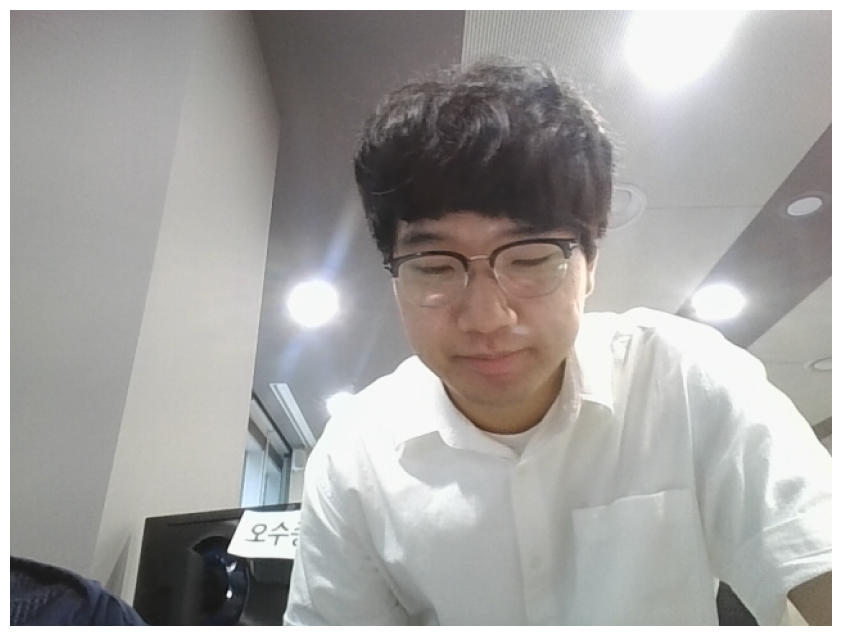

Face Detect : 1
['face_recognition/data/recog_images/2023-07-19-15-48-53\\face.png']
002번 사진 촬영 완료



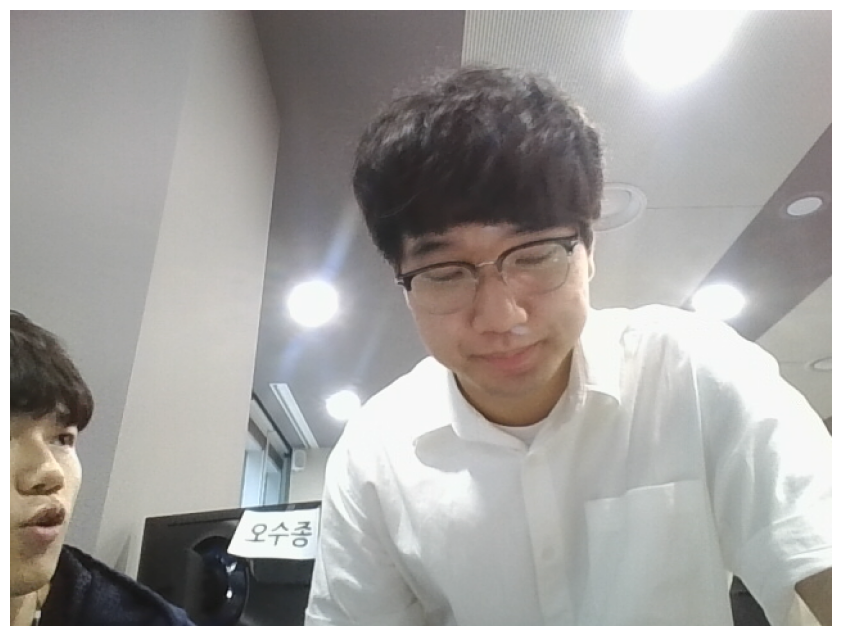

Face Detect : 1
['face_recognition/data/recog_images/2023-07-19-15-49-6\\face.png']


KeyboardInterrupt: 

In [4]:
import cv2
import time
from facenet_pytorch import MTCNN
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from datetime import datetime
from glob import glob 

# 모델 선언
mtcnn = MTCNN(image_size=224,margin=60, keep_all=True, post_process=False, device='cuda:0',)

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("camera open failed")
    exit()

capNum = 0 
while True:
    ret, frame = cap.read()
    if not ret:
        print("Can't read camera")
        break

    #cv2.imshow('PC_camera', frame)

    if cv2.waitKey(1) == ord('q'):
        break

    img_captured = cv2.imwrite('save_img_file/captured_%03d.png' % capNum, frame)
    print('%03d' % capNum + '번 사진 촬영 완료\n')
    time.sleep(3)

     #저장된 이미지
    image_path = 'save_img_file/captured_%03d.png' % capNum
    capNum += 1

    frame = Image.open(image_path)
    frame = np.array(frame)

    # 이미지 확인
    plt.figure(figsize=(12, 8))
    plt.imshow(frame)
    plt.axis('off')
    plt.show()

    # 안면 검출 이미지 저장 경로
    recog_path = 'face_recognition/data/recog_images/'

    # 현재 시간
    now = datetime.now()
    now_path = str(now.date())+'-'+str(now.hour)+'-'+str(now.minute)+'-'+str(now.second)

    # face detect 모델 실행, 결과 저장(save_path=현재시간+n개)
    faces = mtcnn(frame,save_path=recog_path+now_path+'/face.png')

    # 검출된 안면 갯수
    print("Face Detect : " + str(len(faces)))

    # Multi Label 해야하는 이미지들
    recog_images = glob(recog_path+now_path+'/*.png')
    print(recog_images)
    time.sleep(10)

cap.release()
cv2.destroyAllWindows()